## **Hands on Activity: Midterm Skills Exam: Data Wrangling and Analysis**

**Catulay, Weslie Jee L.**

**CPE22S2**

**Submitted to: Roman M. Richard**

In [1]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

CE_IN = fetch_ucirepo(id=20)


Data_x = CE_IN.data.features
Data_y = CE_IN.data.targets

print(CE_IN.metadata)

print(CE_IN.variables)


{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [12]:
# Showing both Data to check

Data_x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [7]:
Data_y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [8]:
# Concatenating Both Data

import pandas as pd
import numpy as np

data = pd.concat([Data_x, Data_y], axis = 1)

data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
# Show Datatypes
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [11]:
data['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

In [14]:
change_nan = {"?" : "Others"}

data.replace(change_nan, inplace = True)
data.fillna('Others', inplace = True)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,Others,321403,HS-grad,9,Widowed,Others,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [15]:
data.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

In [16]:
data.rename(columns = {'native-country' : 'countries'}, inplace = True)
data.set_index(data['countries'],inplace = True)
data.drop('countries', axis = 1, inplace = True)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
countries,,,,,,,,,,,,,,
United-States,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
United-States,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
United-States,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
United-States,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
Cuba,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United-States,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,<=50K.
United-States,64,Others,321403,HS-grad,9,Widowed,Others,Other-relative,Black,Male,0,0,40,<=50K.
United-States,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,<=50K.


In [17]:
data['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [18]:
# Changing the and fixing the correct data output

row_change = {'<=50K.' : '<=50K',
              '>50K.' : '>50K'}

data = data.replace({'income' : row_change})
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
countries,,,,,,,,,,,,,,
United-States,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
United-States,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
United-States,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
United-States,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
Cuba,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United-States,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,<=50K
United-States,64,Others,321403,HS-grad,9,Widowed,Others,Other-relative,Black,Male,0,0,40,<=50K
United-States,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,<=50K


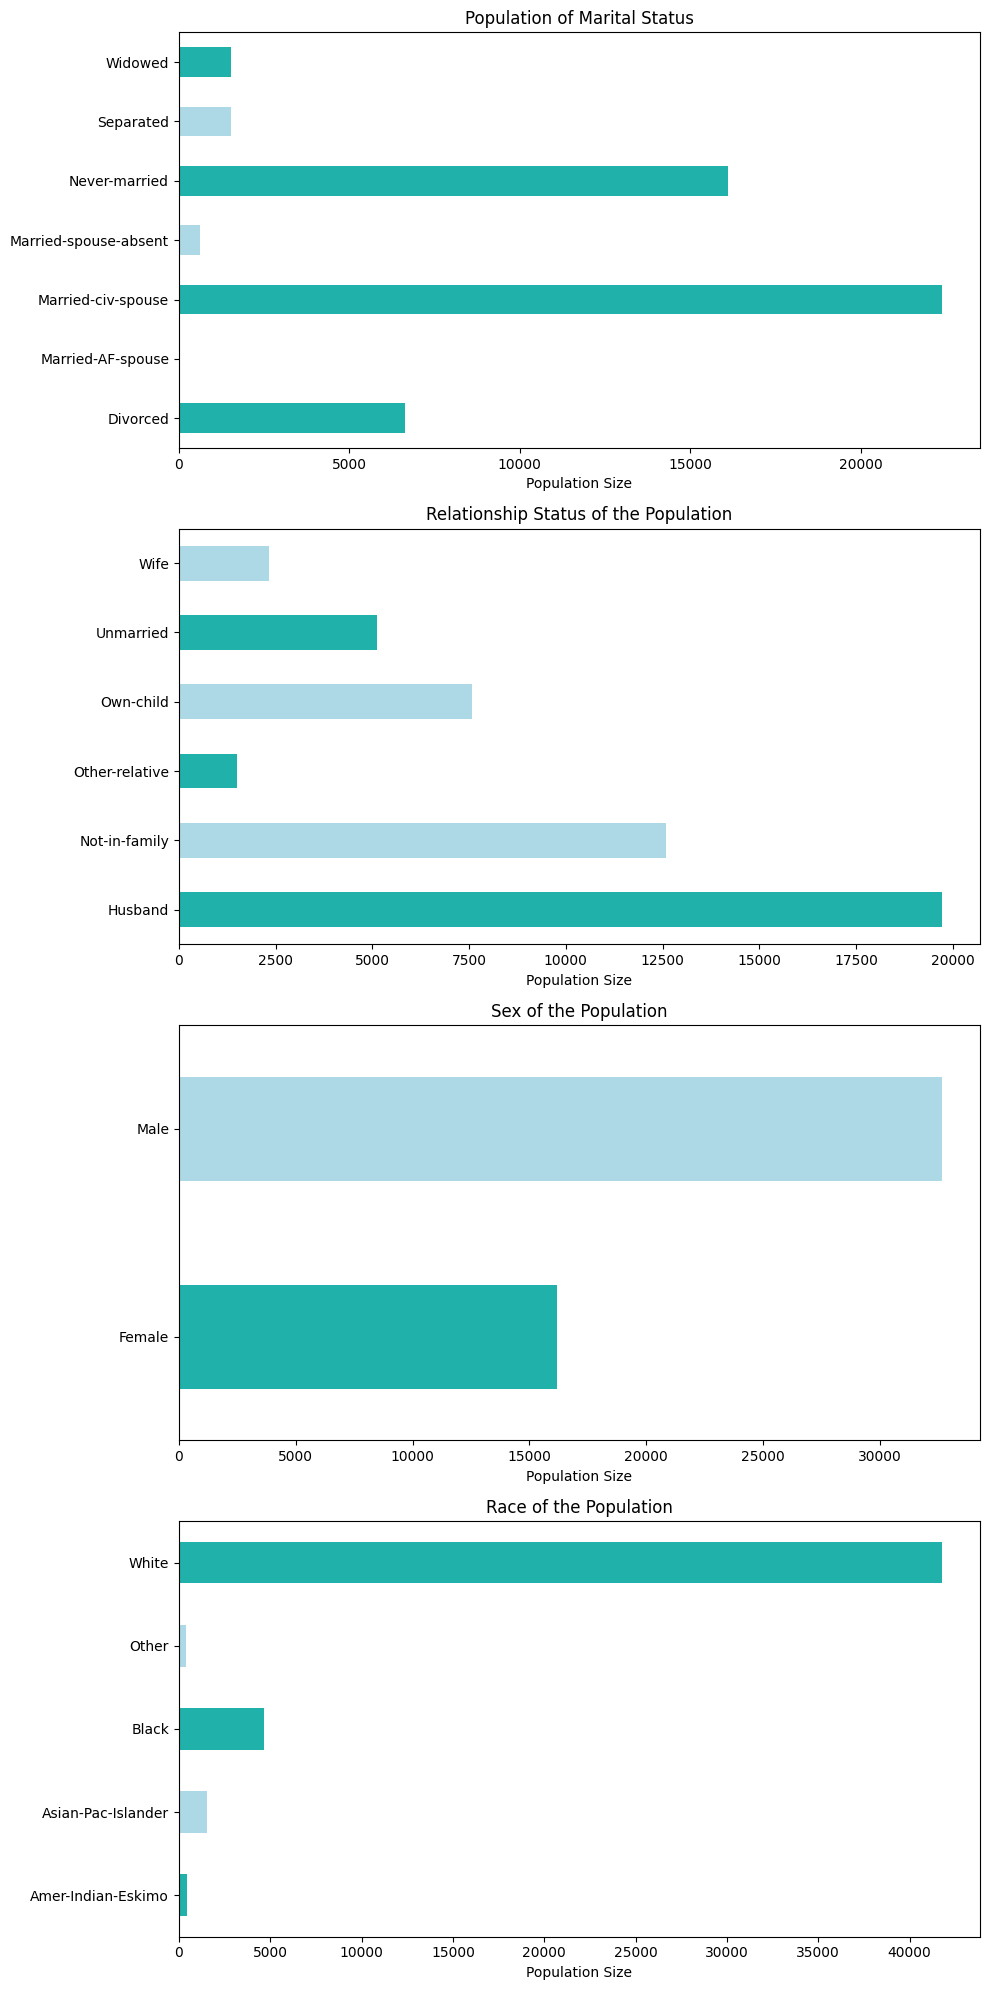

In [20]:
# Performing Data Plots and Perform exploratory data analysis

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(4, figsize = [10,20])

#graph for marital-status column
data.groupby('marital-status').size().plot(kind='barh', ax = ax[0], color = ('lightseagreen','lightblue'))
ax[0].set_title('Population of Marital Status')
ax[0].set_xlabel('Population Size')
ax[0].set_ylabel('')

#graph for relationship column
data.groupby('relationship').size().plot(kind='barh', ax = ax[1], color = ('lightseagreen','lightblue'))
ax[1].set_title('Relationship Status of the Population')
ax[1].set_xlabel('Population Size')
ax[1].set_ylabel('')

#graph for sex column
data.groupby('sex').size().plot(kind='barh', ax = ax[2], color = ('lightseagreen','lightblue'))
ax[2].set_title('Sex of the Population')
ax[2].set_xlabel('Population Size')
ax[2].set_ylabel('')

#graph race column
data.groupby('race').size().plot(kind='barh', ax = ax[3], color = ('lightseagreen','lightblue'))
ax[3].set_title('Race of the Population')
ax[3].set_xlabel('Population Size')
ax[3].set_ylabel('')

fig.tight_layout()

In [22]:
# Checking the Data Population

data_population = data.groupby('countries').size().sort_values(ascending = False)
data_population = data_population.head()
data_population

countries
United-States    43832
Mexico             951
Others             857
Philippines        295
Germany            206
dtype: int64

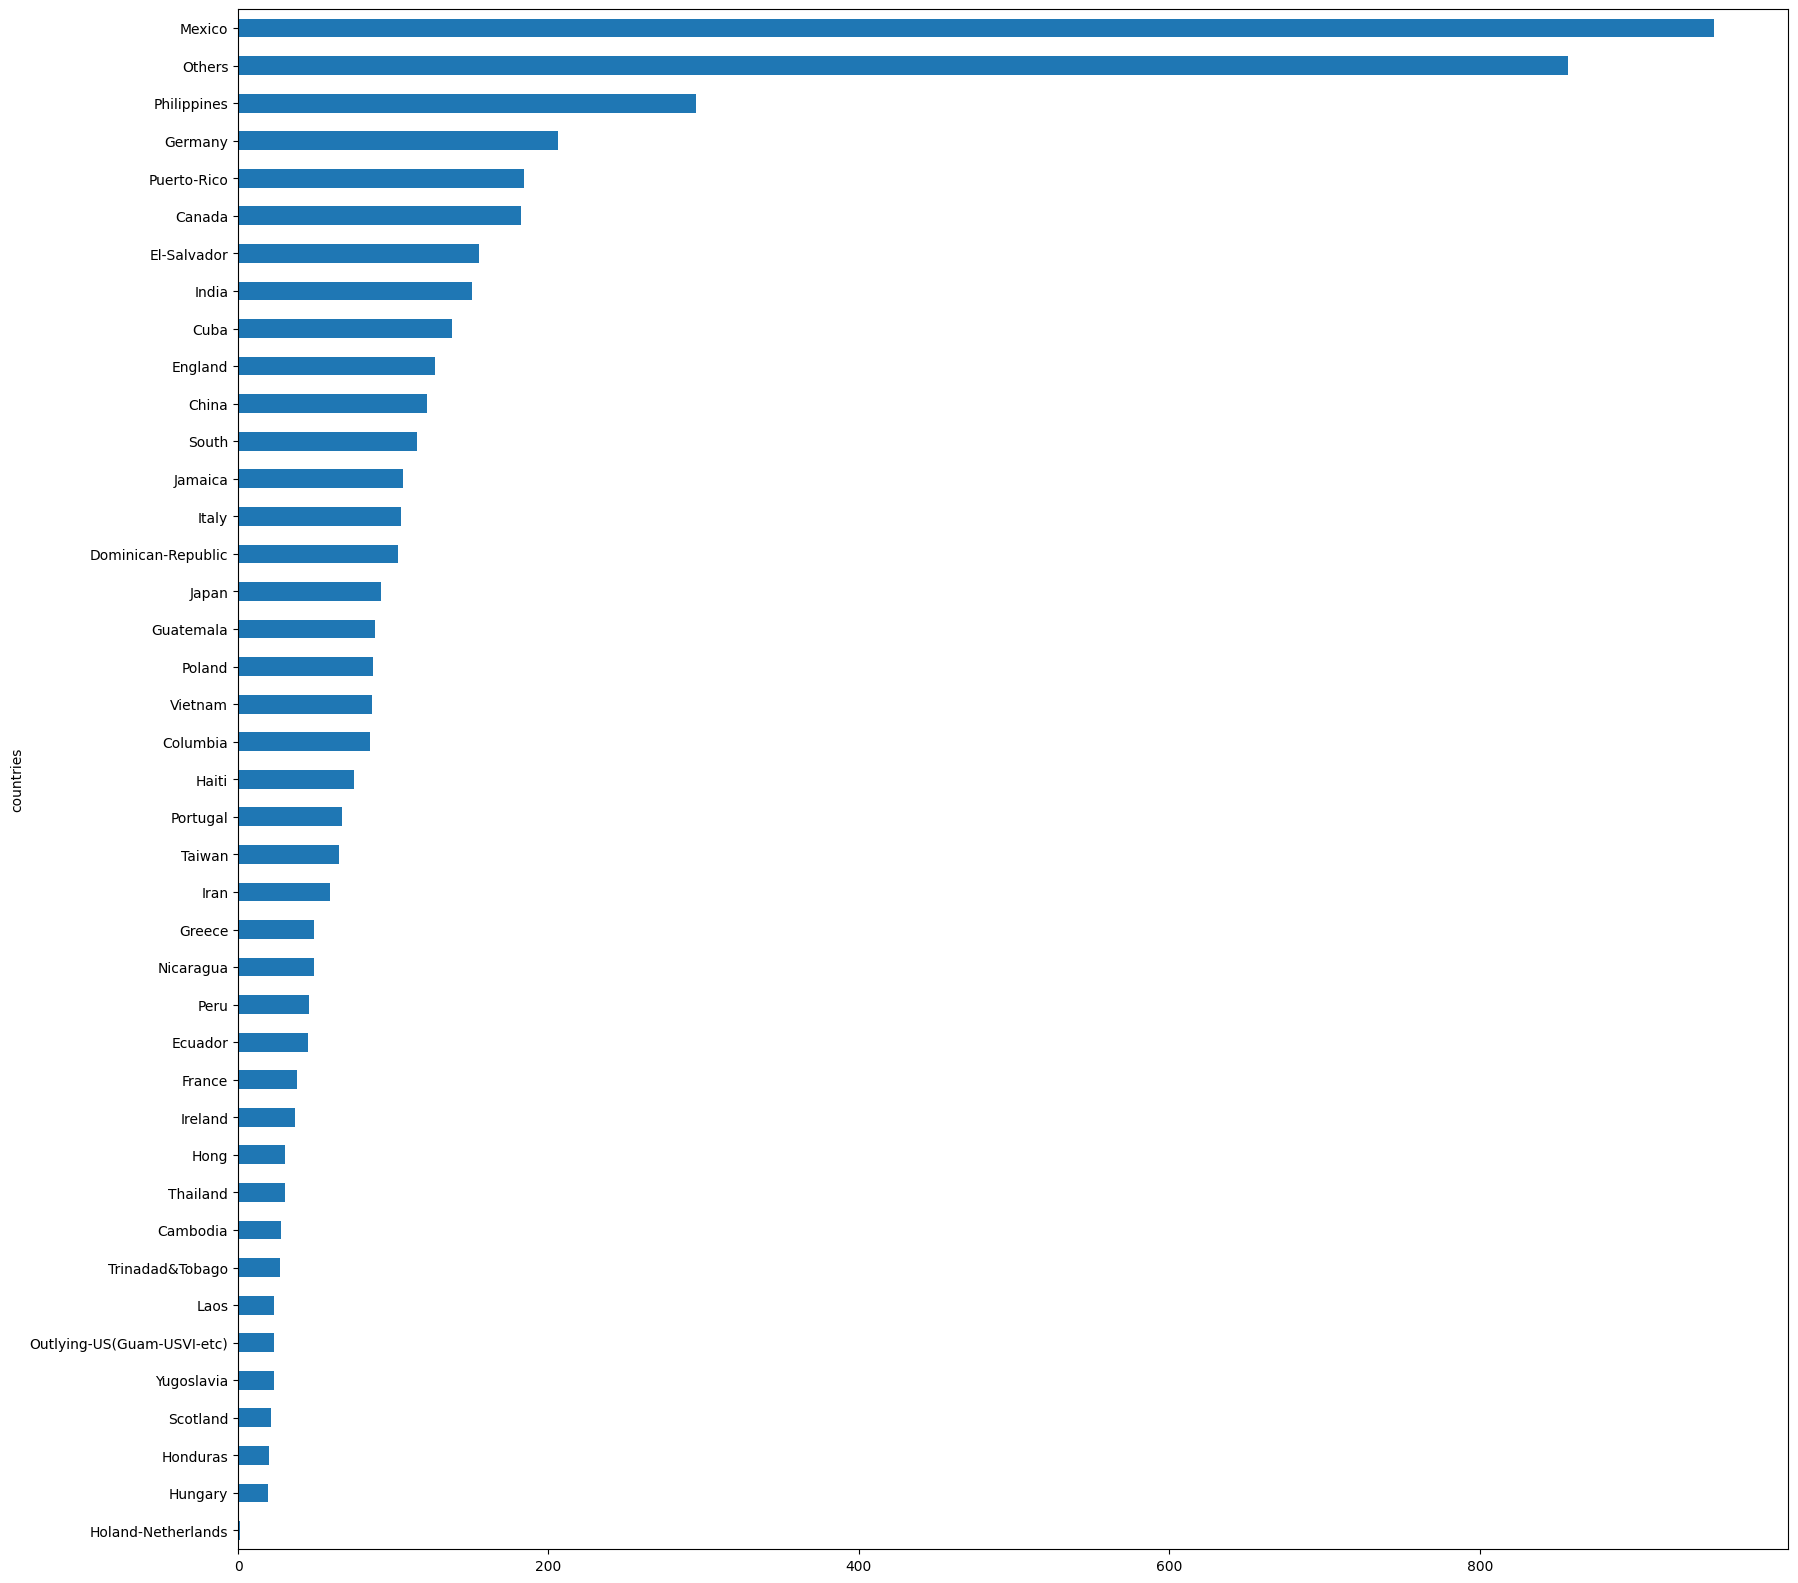

In [23]:
data_population = data.reset_index()
data_population = data.drop('United-States')
data_population.groupby('countries').size().sort_values(ascending = True).plot(kind = 'barh', figsize = (20,20))
fig.tight_layout()

In [24]:
# Since the data has some uncessarry columns let's drop/dlete them

data.drop(['marital-status', 'relationship', 'race', 'sex'], axis = 1, inplace = True)
data


,age,workclass,fnlwgt,education,education-num,occupation,capital-gain,capital-loss,hours-per-week,income
countries,,,,,,,,,,
United-States,39,State-gov,77516,Bachelors,13,Adm-clerical,2174,0,40,<=50K
United-States,50,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,0,0,13,<=50K
United-States,38,Private,215646,HS-grad,9,Handlers-cleaners,0,0,40,<=50K
United-States,53,Private,234721,11th,7,Handlers-cleaners,0,0,40,<=50K
Cuba,28,Private,338409,Bachelors,13,Prof-specialty,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
United-States,39,Private,215419,Bachelors,13,Prof-specialty,0,0,36,<=50K
United-States,64,Others,321403,HS-grad,9,Others,0,0,40,<=50K
United-States,38,Private,374983,Bachelors,13,Prof-specialty,0,0,50,<=50K


<Axes: title={'center': 'Income based on occupation'}, xlabel='occupation'>

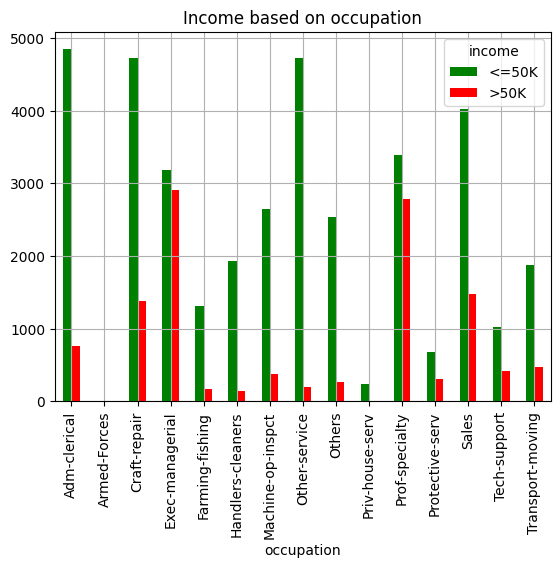

In [26]:
color_list = ['green', 'red']

data1=data.groupby(['occupation','income']).size()
data1=data1.unstack()
data1.plot(kind='bar', grid = True, title ='Income based on occupation', color =('green', 'red'))

<Axes: title={'center': 'Number of workers on difference work class'}, xlabel='workclass'>

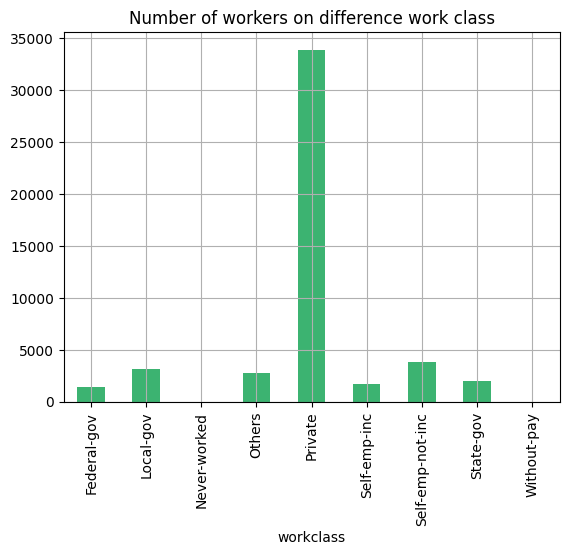

In [27]:
data2 = data.groupby(['workclass']).size()
data2.plot(kind = 'bar', grid = True, title = 'Number of workers on difference work class', color = 'mediumseagreen')

In [28]:
data2
# workclass counts

workclass
Federal-gov          1432
Local-gov            3136
Never-worked           10
Others               2799
Private             33906
Self-emp-inc         1695
Self-emp-not-inc     3862
State-gov            1981
Without-pay            21
dtype: int64

<Axes: title={'center': 'Income based on Work Class'}, ylabel='workclass'>

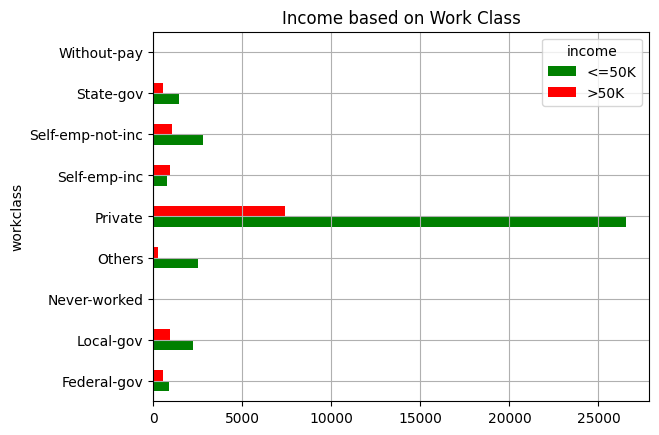

In [29]:
data3 = data.groupby(['workclass','income']).size()
data3=data3.unstack()
data3.plot(kind = 'barh', grid = True, title = 'Income based on Work Class', color = ('green', 'red'))

In [30]:
data3

income,<=50K,>50K
workclass,,
Federal-gov,871.0,561.0
Local-gov,2209.0,927.0
Never-worked,10.0,NaN
Others,2534.0,265.0
Private,26519.0,7387.0
Self-emp-inc,757.0,938.0
Self-emp-not-inc,2785.0,1077.0
State-gov,1451.0,530.0
Without-pay,19.0,2.0


In [31]:
data_4 = data[['education-num', 'occupation']]
data_4.sort_values(by = 'education-num')

,education-num,occupation
countries,,
Mexico,1,Other-service
United-States,1,Exec-managerial
Philippines,1,Priv-house-serv
El-Salvador,1,Other-service
United-States,1,Adm-clerical
...,...,...
United-States,16,Prof-specialty
Mexico,16,Prof-specialty
United-States,16,Prof-specialty


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Transport-moving'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Machine-op-inspct'),
  Text(10, 0, 'Tech-support'),
  Text(11, 0, 'Others'),
  Text(12, 0, 'Protective-serv'),
  Text(13, 0, 'Armed-Forces'),
  Text(14, 0, 'Priv-house-serv')])

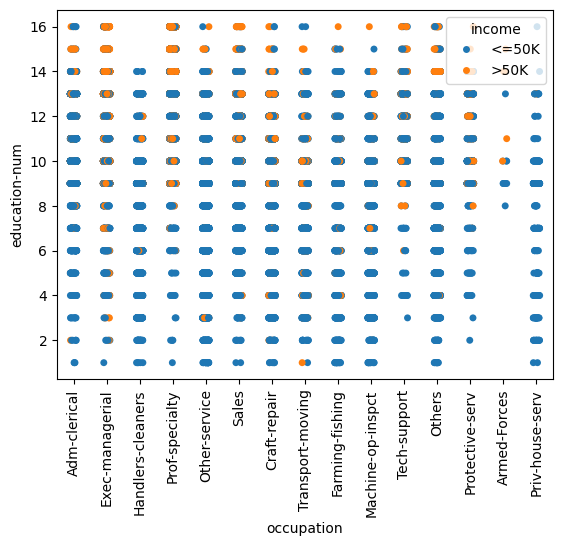

In [35]:
sns.stripplot(
x='occupation',
y='education-num',
hue='income',
data=data
)
plt.xticks(rotation=90)

In [38]:
data_capital = data[['capital-gain', 'capital-loss', 'hours-per-week']]
data_capital = data_capital.groupby('countries').mean()
data_capital.sort_values(by = 'countries', ascending = True, inplace = True)
data_capital

,capital-gain,capital-loss,hours-per-week
countries,,,
Cambodia,697.464286,194.821429,42.035714
Canada,1233.505495,131.159341,40.406593
China,1407.737705,170.655738,38.262295
Columbia,125.364706,65.247059,39.929412
Cuba,470.543478,62.717391,40.101449
Dominican-Republic,1064.456311,39.029126,41.621359
Ecuador,328.288889,0.000000,39.266667
El-Salvador,392.761290,36.367742,36.361290
England,1076.551181,108.913386,41.937008


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16')])

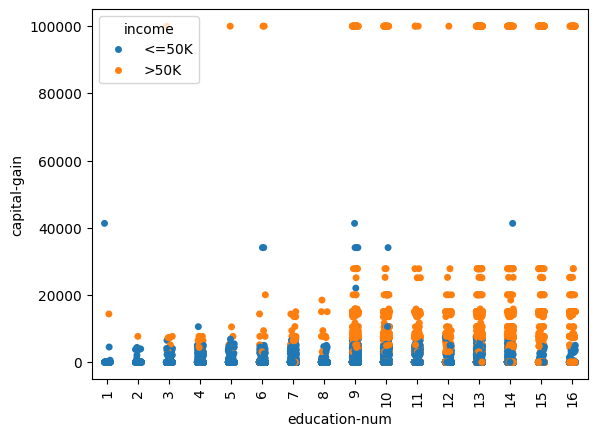

In [40]:
sns.stripplot(
x='education-num',
y='capital-gain',
hue='income',
data=data
)
plt.xticks(rotation=90)

##CONCLUSION:

Doing this kind of plot and graphs will helps us to see the different occupation, educatinal level, income, working hours, and work class sector of our population.